# Рубежный контроль №2

#### Необходимо подготовить отчет по рубежному контролю и разместить его в Вашем репозитории. Вы можете использовать титульный лист, или в начале ноутбука в текстовой ячейке указать Ваши Ф.И.О. и группу.

## Тема: Методы построения моделей машинного обучения.

### Задача 1. Классификация текстов на основе методов наивного Байеса.


Данный вариант выполняется на основе материалов лекции часть 1 и часть 2.

Необходимо решить задачу классификации текстов на основе любого выбранного Вами датасета (кроме примера, который рассматривался в лекции). Классификация может быть бинарной или многоклассовой. Целевой признак из выбранного Вами датасета может иметь любой физический смысл, примером является задача анализа тональности текста.

Необходимо сформировать признаки на основе CountVectorizer или TfidfVectorizer.

В качестве классификаторов необходимо использовать два классификатора, не относящихся к наивным Байесовским методам (например, LogisticRegression, LinearSVC), а также Multinomial Naive Bayes (MNB), Complement Naive Bayes (CNB), Bernoulli Naive Bayes.

Для каждого метода необходимо оценить качество классификации с помощью хотя бы двух метрик качества классификации (например, Accuracy, ROC-AUC).

Сделате выводы о том, какой классификатор осуществляет более качественную классификацию на Вашем наборе данных.


##### Dataset о спаме
###### Куликов А.Б. 
###### Группа ИУ5-22М

In [1]:
import pandas as pd
pd.set_option('display.max.columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_colwidth', -1)
sns.set()

In [3]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


In [7]:
df.isna().sum()

v1            0   
v2            0   
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


У столбцов 2,3,4 слишком много пустых, поэтому попросту избавимся от них

In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

df = df.rename(columns = {'v1': 'target','v2': 'text'})

df.target.value_counts()

ham     4825
spam    747 
Name: target, dtype: int64


Классы несбалансированны поэтому будум использовать метрики (precission recall roc_auc)

Посмотрим на распределение длины сообщений в зависимости от класса

ham mean: 71.02362694300518
spam mean: 138.8661311914324


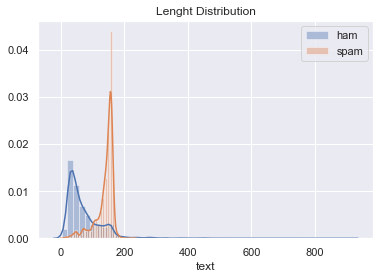

In [11]:
s1 = df[df.target == 'ham'].text.apply(len)
s2 = df[df.target == 'spam'].text.apply(len)

sns.distplot(s1,label='ham')
sns.distplot(s2,label='spam')

sns.set()

plt.title('Lenght Distribution')
plt.legend()

print('ham mean: %s' % s1.mean())
print(f'spam mean: {s2.mean()}')

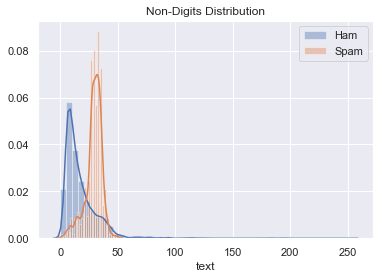

In [12]:
s1 = df[df['target'] == 'ham']['text'].str.replace(r'\w+', '').str.len()
s2 = df[df['target'] == 'spam']['text'].str.replace(r'\w+', '').str.len()

sns.distplot(s1, label='Ham')
sns.distplot(s2, label='Spam')

plt.title('Non-Digits Distribution')
plt.legend()

### Подготовим выборки для использования в модели и разделим датасет на тренировочный и тестовый

In [14]:
from sklearn.preprocessing import LabelEncoder


In [15]:
X = df.text
la = LabelEncoder()
y = df.target
y = la.fit_transform(y)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Построим модели

In [17]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression


tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2',
                                               ngram_range=(1, 2),
                                               stop_words='english')


text_clf = Pipeline([('tfidf', tfidf),
                     ('MnNB', MultinomialNB()),
])

text_clf2 = Pipeline([('tfidf', tfidf),
                     ('lSVC', CalibratedClassifierCV(LinearSVC())),
])

text_clf3 = Pipeline([('tfidf', tfidf),
                     ('LR', LogisticRegression()),
])

result_df = pd.DataFrame()

## MultinomialNB

In [18]:
%time text_clf.fit(X_train, y_train);


CPU times: user 373 ms, sys: 26.7 ms, total: 400 ms
Wall time: 424 ms


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('MnNB',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

accuracy train: 0.9792307692307692
accuracy test : 0.9635167464114832 

precission train: 1.0
precission test : 1.0 

recall train: 0.8471698113207548
recall test : 0.7188940092165899 



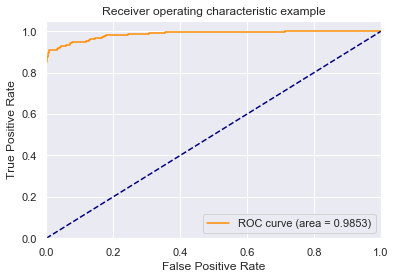

In [19]:
from sklearn.metrics import accuracy_score as AS, precision_score as PS, recall_score as RS

result_df.loc['Multinomial', 'AS train'] = AS(y_train, text_clf.predict(X_train))
result_df.loc['Multinomial', 'PS train'] = PS(y_train, text_clf.predict(X_train))
result_df.loc['Multinomial', 'RS train'] = RS(y_train, text_clf.predict(X_train))

result_df.loc['Multinomial', 'AS test'] = AS(y_test, text_clf.predict(X_test))
result_df.loc['Multinomial', 'PS test'] = PS(y_test, text_clf.predict(X_test))
result_df.loc['Multinomial', 'RS test'] = RS(y_test, text_clf.predict(X_test))


print('accuracy train:', AS(y_train, text_clf.predict(X_train)))
print('accuracy test :', AS(y_test, text_clf.predict(X_test)), '\n')

print('precission train:', PS(y_train, text_clf.predict(X_train)))
print('precission test :', PS(y_test, text_clf.predict(X_test)), '\n')

print('recall train:', RS(y_train, text_clf.predict(X_train)))
print('recall test :', RS(y_test, text_clf.predict(X_test)), '\n')

from sklearn.metrics import roc_curve, auc
y_pred_prob = text_clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## LinearSVC

In [20]:
%time text_clf2.fit(X_train, y_train);


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 579 ms, sys: 28 ms, total: 606 ms
Wall time: 663 ms


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('lSVC',
                 CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0,
                                                                 class

accuracy train: 0.9994871794871795
accuracy test : 0.9802631578947368 

precission train: 0.9962406015037594
precission test : 0.9144144144144144 

recall train: 1.0
recall test : 0.9354838709677419 



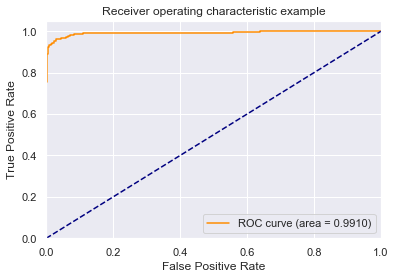

In [21]:
from sklearn.metrics import accuracy_score as AS, precision_score as PS, recall_score as RS

result_df.loc['LinearSVC', 'AS train'] = AS(y_train, text_clf2.predict(X_train))
result_df.loc['LinearSVC', 'PS train'] = PS(y_train, text_clf2.predict(X_train))
result_df.loc['LinearSVC', 'RS train'] = RS(y_train, text_clf2.predict(X_train))
result_df.loc['LinearSVC', 'AS test']  = AS(y_test , text_clf2.predict(X_test))
result_df.loc['LinearSVC', 'PS test']  = PS(y_test , text_clf2.predict(X_test))
result_df.loc['LinearSVC', 'RS test']  = RS(y_test , text_clf2.predict(X_test))



print('accuracy train:', AS(y_train, text_clf2.predict(X_train)))
print('accuracy test :', AS(y_test, text_clf2.predict(X_test)), '\n')

print('precission train:', PS(y_train, text_clf2.predict(X_train)))
print('precission test :', PS(y_test, text_clf2.predict(X_test)), '\n')

print('recall train:', RS(y_train, text_clf2.predict(X_train)))
print('recall test :', RS(y_test, text_clf2.predict(X_test)), '\n')

from sklearn.metrics import roc_curve, auc
y_pred_prob = text_clf2.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## LogisticRegression

In [22]:
%time text_clf3.fit(X_train, y_train)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 675 ms, sys: 30 ms, total: 705 ms
Wall time: 2.08 s


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('LR',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scal

accuracy train: 0.9448717948717948
accuracy test : 0.9521531100478469 

precission train: 0.9937304075235109
precission test : 0.9858156028368794 

recall train: 0.5981132075471698
recall test : 0.6405529953917051 



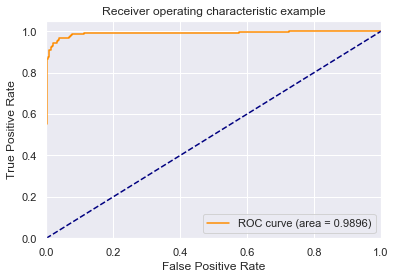

In [23]:
from sklearn.metrics import accuracy_score as AS, precision_score as PS, recall_score as RS


result_df.loc['Logistic_regression', 'AS train'] = AS(y_train, text_clf3.predict(X_train))
result_df.loc['Logistic_regression', 'PS train'] = PS(y_train, text_clf3.predict(X_train))
result_df.loc['Logistic_regression', 'RS train'] = RS(y_train, text_clf3.predict(X_train))

result_df.loc['Logistic_regression', 'AS test'] = AS(y_test, text_clf3.predict(X_test))
result_df.loc['Logistic_regression', 'PS test'] = PS(y_test, text_clf3.predict(X_test))
result_df.loc['Logistic_regression', 'RS test'] = RS(y_test, text_clf3.predict(X_test))


print('accuracy train:', AS(y_train, text_clf3.predict(X_train)))
print('accuracy test :', AS(y_test, text_clf3.predict(X_test)), '\n')

print('precission train:', PS(y_train, text_clf3.predict(X_train)))
print('precission test :', PS(y_test, text_clf3.predict(X_test)), '\n')

print('recall train:', RS(y_train, text_clf3.predict(X_train)))
print('recall test :', RS(y_test, text_clf3.predict(X_test)), '\n')

from sklearn.metrics import roc_curve, auc
y_pred_prob = text_clf3.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Сравнение моделей

In [24]:
result_df


,AS train,PS train,RS train,AS test,PS test,RS test
Multinomial,0.979231,1.000000,0.847170,0.963517,1.000000,0.718894
LinearSVC,0.999487,0.996241,1.000000,0.980263,0.914414,0.935484
Logistic_regression,0.944872,0.993730,0.598113,0.952153,0.985816,0.640553



#### Вывод: Сравнивая метрики моделей видим, что модель с LinearSVC немного уступает остальным по точности, одако значительно выигрывает по полноте